# IMAGE 1 - Einige Filter

In [1]:
import numpy as np
import scipy
import matplotlib.pyplot as plt
from PIL import Image


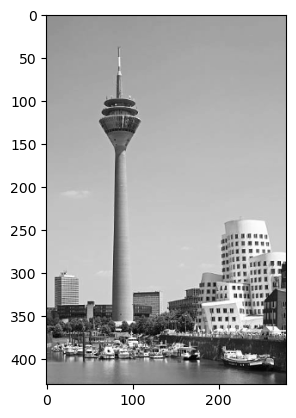

In [2]:
def load_image( infilename ) :
    img = Image.open( infilename )
    img.load()
    data = np.asarray( img, dtype="int32" )
    return data

def save_image( npdata, outfilename ) :
    img = Image.fromarray( np.asarray( np.clip(npdata,0,255), dtype="uint8"), "L" )
    img.save( outfilename )

img = load_image("images/rheinturm.png")
plt.imshow(img,cmap='gray')
plt.show()

Wir definieren nun eine Funktion, die einen Filter-Kernel auf die Bitmap-Dateien anwendet. NumPy verfügt über keine Funktion, die eine zweidimensionale Faltung durchführt; dies ist aber kein großes Problem.

In [3]:
def faltung(m1:np.ndarray ,m2: np.ndarray) -> float:
    return np.sum(np.multiply(m1,m2.T))

def filter(data: np.ndarray,kernel: np.ndarray) -> np.ndarray:
    size = (len(kernel) + 1 // 2)
    res = data.copy()
    for r in range(size,data.shape[0] - size):
        for c in range(size,data.shape[1] - size):
            res[r,c] = faltung(kernel,data[r:r+size,c:c+size])
    return res

# Die Bibliothek SciPy hat eine eigene Implementierung
def sp_filter(data: np.ndarray,kernel: np.ndarray) -> np.ndarray:
    return scipy.signal.convolve2d(data,kernel)   

### Glättungsfilter ("Weichzeichner")

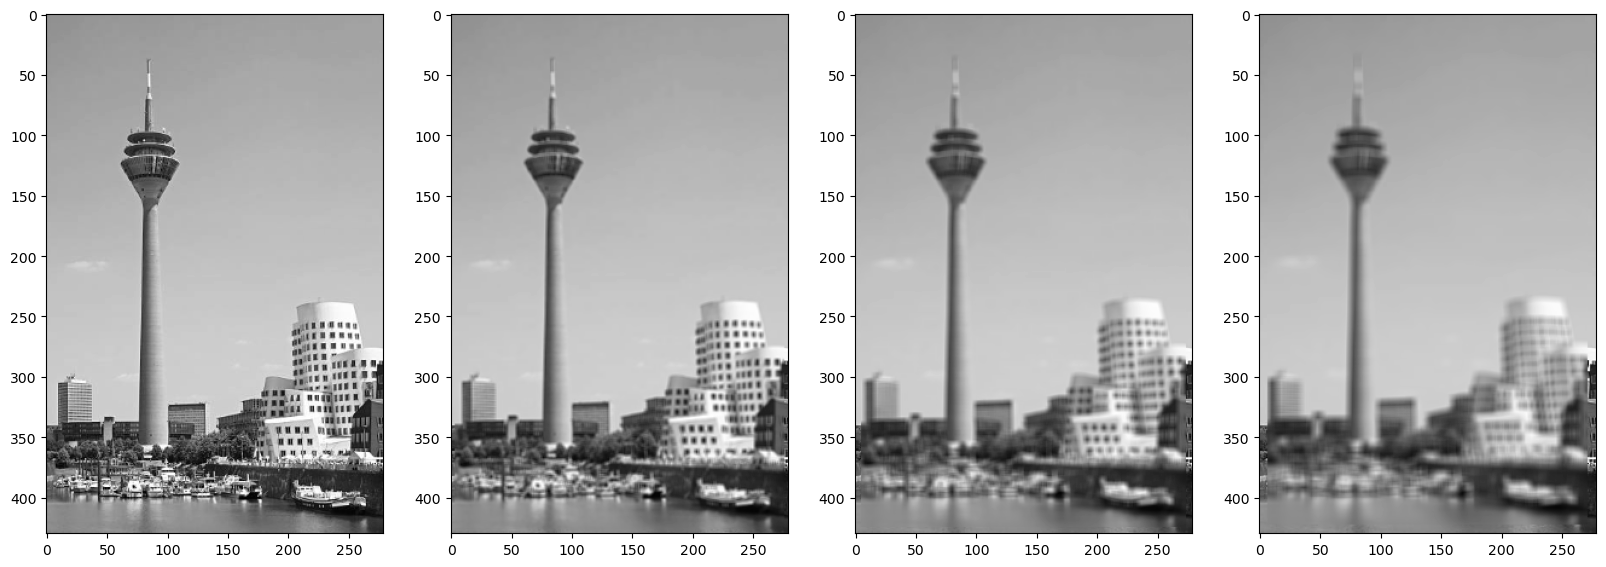

In [4]:
sizes = [1,3,5,7]
kernel = [np.ones(size*size,dtype=float).reshape(size,size) / (size*size) for size in sizes] 
plt.figure(figsize=(20, 10))
for n, k in enumerate(kernel):
    plt.subplot(1,len(sizes),n+1)
    plt.imshow(filter(img,k),cmap='gray')
plt.show()

### Kantendetektoren

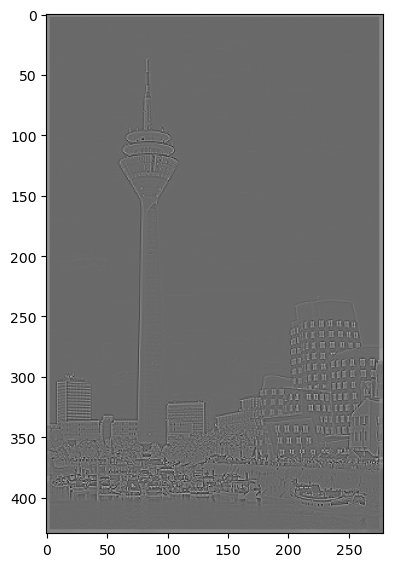

In [5]:
kernel = [np.array([[0,1,0],[1,-4,1],[0,1,0]]) ] 
plt.figure(figsize=(20, 10))
for n, k in enumerate(kernel):
    plt.subplot(1,len(sizes),n+1)
    plt.imshow(filter(img,k),cmap='gray')
plt.show()